In [132]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
df = pd.read_csv('Data.csv')
import numpy as np
import matplotlib.pyplot as plt

In [133]:
X = df.drop(['device_category'], axis=1)

In [134]:
y = df.iloc[:,-1]

In [135]:
y = pd.get_dummies(y[::-1]).values

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [137]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [138]:
y_pred = classifier.predict(X_test)

In [139]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [140]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7657894736842106


In [141]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# **Feature Importance**

### **Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top  features for the dataset.**

In [142]:
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [143]:
print(model.feature_importances_)

[3.29966471e-03 2.97562074e-03 2.78856425e-03 4.85993428e-03
 4.28854248e-03 6.54413516e-03 4.32369870e-03 7.96952997e-04
 1.41797107e-02 6.88709149e-04 6.50083916e-03 0.00000000e+00
 4.59496919e-03 6.24762845e-03 5.38082962e-03 7.13366773e-03
 2.03444746e-05 1.21710706e-02 6.00207233e-03 1.61934911e-02
 7.28358131e-03 1.62249174e-02 1.75362293e-02 1.76665094e-02
 1.44783989e-02 1.57888823e-02 1.65452384e-02 1.62893790e-02
 1.42893262e-02 4.18887871e-03 6.01577860e-03 8.00226256e-03
 3.23702371e-03 7.42148208e-03 2.48482089e-03 2.26217129e-03
 2.74559366e-03 4.77020741e-03 3.02836406e-03 1.81298163e-02
 6.28069883e-03 1.57465743e-02 1.72773902e-02 1.73941175e-02
 1.61810969e-02 1.72961524e-02 1.60811315e-02 1.67918274e-02
 1.43189907e-02 8.81781338e-03 8.95618553e-03 4.72967662e-04
 1.77232858e-02 7.55859471e-04 1.72332448e-02 4.04638797e-03
 1.23079206e-02 1.88391137e-02 5.57652721e-03 7.69359948e-03
 4.59645685e-04 1.26726419e-02 2.17875468e-03 0.00000000e+00
 7.30608750e-03 2.537290

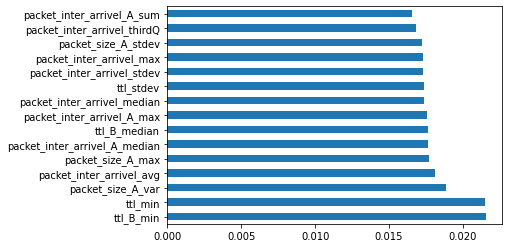

In [144]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

# **Correlation Matrix with Heatmap**

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.


In [145]:
import numpy as np
import seaborn as sns

In [146]:
#get correlations of each features in dataset
corrmat = df.corr()

In [147]:
top_corr_features = corrmat.index
plt.figure(figsize=(20,15))
#plt.subplots(figsize=(20,15))

<Figure size 1440x1080 with 0 Axes>

<Figure size 1440x1080 with 0 Axes>

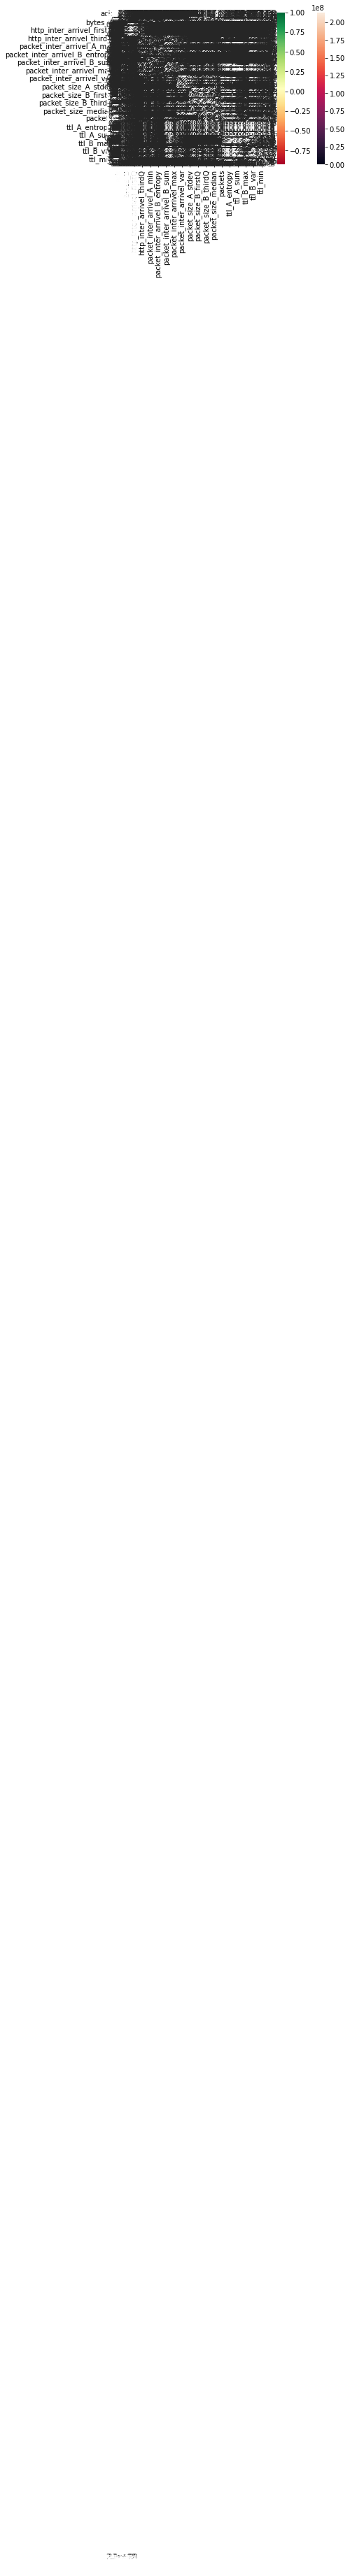

In [148]:
#plot heat map
sns.heatmap(df.iloc[:, 1:6:], annot=True, linewidths=.5)
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")